## 1. Capas Embedding en Keras

[Embedding Layers](https://keras.io/layers/embeddings/) 

In [1]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense

Vamos a implementar una red neuronal que clasifique reviews de restaurantes en positivas o negativas.

In [3]:
# Defino 10 reviews de un restaurante
reviews = [
    'No vayáis nunca!',
    'Servicio horrible',
    'Camareros maleducados',
    'Comida fría',
    'Comida asquerosa!',
    'Impresionante',
    'Servicio impresionante!',
    'Mola!',
    'muy pobre',
    'No han podido hacerlo mejor'
]

# Definir etiquetas (1=negativo, 0=positivo)
labels = array([1,1,1,1,1,0,0,0,0,0])

Fíjate que una de las etiquetas es incorrecta. Esto suele ocurrir, y generalmente encontramos ruido en los datos de entrenamiento.  

Definimos un vocabulario de 50 palabras (aunque no tengamos 50, es conveniente usar un valor algo mayor que el necesario). Para la entrada, utilizamos one-hot-encoding de los textos. 

In [4]:
VOCAB_SIZE = 50
encoded_reviews = [one_hot(d,VOCAB_SIZE) for d in reviews]
print("Encoded reviews:", encoded_reviews)

Encoded reviews: [[32, 31, 41], [30, 42], [46, 38], [41, 40], [41, 5], [41], [30, 41], [8], [21, 9], [32, 2, 8, 17, 32]]


Necesitamos hacer un padding para que los vectores tengan la misma longitud. Utilizamos un pad de 4 palabras y eliminamos las que superen la cuarta palabra

In [5]:
MAX_LENGTH = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=MAX_LENGTH, padding='post')
print(padded_reviews)

[[32 31 41  0]
 [30 42  0  0]
 [46 38  0  0]
 [41 40  0  0]
 [41  5  0  0]
 [41  0  0  0]
 [30 41  0  0]
 [ 8  0  0  0]
 [21  9  0  0]
 [ 2  8 17 32]]


Vamos a crear una red neuronal para clasificar las reviews

In [6]:
model = Sequential()
embedding_layer = Embedding(input_dim=VOCAB_SIZE, output_dim=8, input_length=MAX_LENGTH)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


La primera capa convierte los 4 índices de las reviews en 4 vectores de dimensión 8
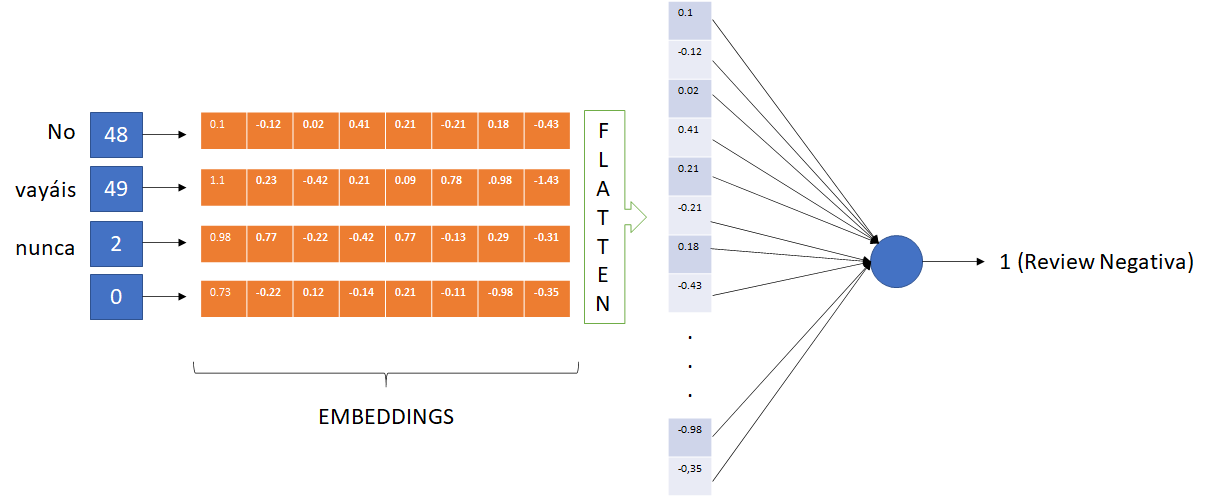

In [8]:
model.fit(padded_reviews, labels, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 533ms/step - loss: 0.6968 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6953 - acc: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6939 - acc: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6924 - acc: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6909 - acc: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6894 - acc: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6879 - acc: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6864 - acc: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6850 - acc: 0.6000
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6835 - acc: 0.6000
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.68

1/1 [==============================] - 0s 3ms/step - loss: 0.5344 - acc: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5321 - acc: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5297 - acc: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5273 - acc: 1.0000
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5250 - acc: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5226 - acc: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5202 - acc: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5178 - acc: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5153 - acc: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5129 - acc: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5105 - ac

Con esto podemos ver los embeddings que la red ha aprendido. Cada vector asociado a una palabra se encuentra en un espacio de 8 dimensiones en el que las palabras asociadas con reviews positivas están más cerca entre ellas, así como las negativas también están más próximas entre sí.  
Además, las capa densa permite transformar estos embeddings a predicciones

In [15]:
print(embedding_layer.get_weights()[0].shape)

(50, 8)


In [29]:
print(one_hot('No', VOCAB_SIZE))
embedding_layer.get_weights()[0][32]

[32]


array([-0.11432155,  0.05980603, -0.13873565,  0.07075723,  0.12698843,
       -0.15397197,  0.1009559 ,  0.10984992], dtype=float32)

Podemos medir el accuracy de la red, incluyendo los embeddings y la capa densa

In [17]:
loss, accuracy = model.evaluate(padded_reviews, labels)
loss, accuracy

1/1 [==============================] - 0s 159ms/step - loss: 0.5056 - acc: 1.0000


(0.5056249499320984, 1.0)

Aunque el accuracy sea 1 (indicando que probablemente haya overfitting), la función de coste no es cero, lo cual indica que a pesar de que las probabilidades que predice el modelo indican una correcta predicción, la red no consigue una confianza absoluta en cada respuesta. 

In [21]:
new_review = 'No volveré nunca'
new = [one_hot(new_review,VOCAB_SIZE)]
new2 = pad_sequences(new, maxlen=MAX_LENGTH, padding='post')
model.predict(new2)

array([[0.5356001]], dtype=float32)

In [22]:
new_review = 'Mejor imposible'
new = [one_hot(new_review,VOCAB_SIZE)]
new2 = pad_sequences(new, maxlen=MAX_LENGTH, padding='post')
model.predict(new2)

array([[0.567929]], dtype=float32)

**Do it yourself**: Calcula las distancias de los siguientes pares de palabras a través de sus embeddings:  

1) horrible - maleducados  
2) horrible - impresionante

## 2. Word2Vec

Word2Vec es una de las técnicas más populares de embeddings en palabras. Utiliza como entrada un "corpus" de texto y su salida es un conjunto de vectores. Es capaz de capturar el significado de una palabra en un documento, su similitud semántica y sintáctica y la relación de las palabras entre sí

La librería Gensim nos permite utilizar el embedding de Word2Vec.  
En este ejemplo vamos a hacer web scraping de un [artículo](https://en.wikipedia.org/wiki/Artificial_intelligence) de Wikipedia para tener un corpus de texto

En el código anterior, convertimos el texto del artículo a minúsculas y eliminamos los dígitos y caracteres especiales, quedándonos únicamente con las palabras.   

El modelo Word2Vec se entrena con una colección de palabras. En primer lugar, necesitamos convertir nuestro artículo en frases, para lo cual utilizamos `nltk.sent_tokenize`. Para convertir frases en palabras, usaremos `nltk.word_tokenize`. Por último, eliminamos las palabras sin significado (*stop words*) del texto

In [ ]:
# !pip install nltk

Con la librería Gensim podemos implementar un modelo Word2Vec. La lista de palabras se utiliza como entrada, pudiendo especificar el número mínimo de veces que cada palabra tiene que aparecer para que sea tomada en consideración.

In [ ]:
#!pip install gensim

Podemos ver el diccionaro de palabras

Veamos cuál es la representación vectorial de la palabra "artificial"

Podemos buscar palabras similares a una dada